**On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("D:/Shopify/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
# to understand the 'orders data over a 30 day window' We further look at the ['created_at'] column
# we find all the timestamp are within the range of (2017-03-01 0:08:09, 2017-03-30 11:59:59) 
df.sort_values(by = ['created_at'], ascending = True)['created_at']

1862    2017-03-01 0:08:09
1741    2017-03-01 0:10:19
3228    2017-03-01 0:14:12
1267    2017-03-01 0:19:31
2689    2017-03-01 0:22:25
               ...        
2765    2017-03-30 9:22:41
4890    2017-03-30 9:27:00
244     2017-03-30 9:30:28
211     2017-03-30 9:40:40
145     2017-03-30 9:55:00
Name: created_at, Length: 5000, dtype: object

In [5]:
# Descriptive Statistics of the whole dataset
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


From the Graph above we found that the $3145.13 is actually the mean of order_amount. which have the formula like this:
sum(order_amount)/count(order_id) 

And look through the column order_amount we found that the max is much higher than the 1st, 2nd and 3rd quartile. And the std of this column is too high.

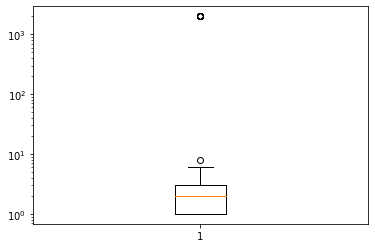

In [6]:
# to further explore the order_amount column
plt.boxplot(df['total_items'])
plt.yscale('log')

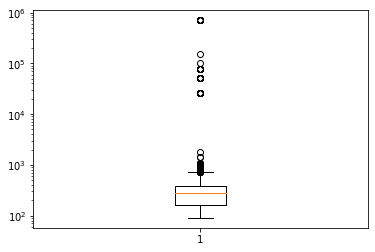

In [33]:
plt.boxplot(df['order_amount'])
plt.yscale('log')

We found there are several outliers on both 'total_items' and 'order_amount' , we will first find they out and see how those value are skewed the whole dataset.

array([[<AxesSubplot:title={'center':'order_amount'}>]], dtype=object)

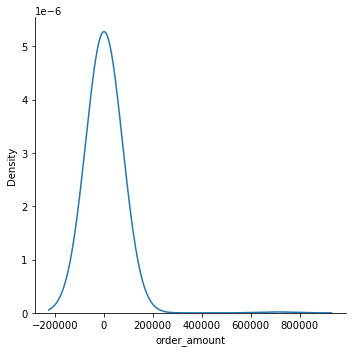

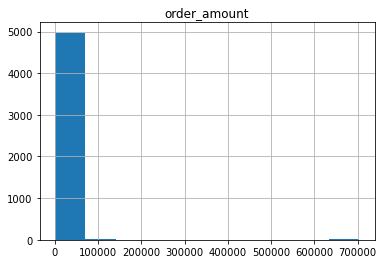

In [24]:
sns.displot( x = df['order_amount'], kind = "kde", bw_adjust = 10)
df.hist(column = 'order_amount')

In [34]:
df.sort_values(by = ['order_amount'], ascending = False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


So we can see that The abnormal order comes from the same shop (Shop_id	42) and the same user. The payment method is all credit_card.
Also the created_at time seems like fraudulent as it all happens at 4:00:00 . It doesn't appear to be human behavior.

### a.Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

So far we found the data that affect our caculation on average order value. It's actually several outliers that affect our caculation. And shop 42 have some anomalous behavior according our records.

#### As each of these shops sells only one model of shoes, we can caulate the total demand for each shop and average price for each shop.

In [8]:
TotalAmount_by_ShopId = df.groupby(['shop_id'])['order_amount'].sum().reset_index(name = 'Revenue')
TotalItem_by_ShopId = df.groupby(['shop_id'])['total_items'].sum().reset_index(name = 'Total_Ordered_Items')
Info_ShopId = pd.merge(TotalAmount_by_ShopId, TotalItem_by_ShopId, how = 'left', left_on = 'shop_id',
                      right_on = 'shop_id')
Info_ShopId['Revenue_Per_Item'] = Info_ShopId['Revenue']/Info_ShopId['Total_Ordered_Items']

In [9]:
Info_ShopId.head()

,shop_id,Revenue,Total_Ordered_Items,Revenue_Per_Item
0,1,13588,86,158.0
1,2,9588,102,94.0
2,3,14652,99,148.0
3,4,13184,103,128.0
4,5,13064,92,142.0


          shop_id       Revenue  Total_Ordered_Items  Revenue_Per_Item
count  100.000000  1.000000e+02           100.000000        100.000000
mean    50.500000  1.572564e+05           439.360000        407.990000
std     29.011492  1.216218e+06          3396.366111       2557.462906
min      1.000000  6.840000e+03            67.000000         90.000000
25%     25.750000  1.293050e+04            88.000000        132.750000
50%     50.500000  1.488750e+04           100.000000        153.000000
75%     75.250000  1.760000e+04           111.250000        168.250000
max    100.000000  1.199018e+07         34063.000000      25725.000000


Text(0.5, 1.0, 'Quantity-Price')

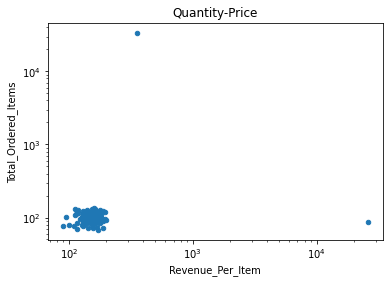

In [11]:
print(Info_ShopId.describe())
Info_ShopId.plot.scatter(x = 'Revenue_Per_Item',y='Total_Ordered_Items', logx=True,logy =True)
plt.title("Quantity - Price")

We observe another outlier which have a really high price on one item we decided to find it out.

In [13]:
Info_ShopId.loc[(Info_ShopId['Revenue_Per_Item'] > 10000)]

,shop_id,Revenue,Total_Ordered_Items,Revenue_Per_Item
77,78,2263800,88,25725.0


In [15]:
df.loc[df['shop_id'] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


Through the graph above we can see This is all normal transaction. So this(Shop_ID 78) is a shop that sell **Luxury brand** sneaker.
This shop actually have high commercial value. Sometimes we call it **"Long Tail Marketing"**

However if we want to caculate the AOV that represent the most sneaker shop on Shopify we still need to exclude it.

In [29]:
df_cleaned = df.loc[(df['shop_id'] != 42)&(df['shop_id'] != 78)]

array([[<AxesSubplot:title={'center':'order_amount'}>]], dtype=object)

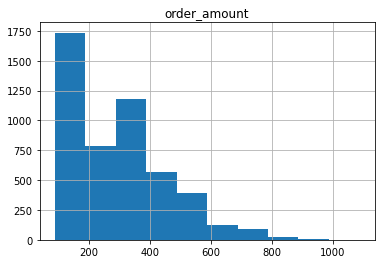

In [31]:
df_cleaned.hist(column = 'order_amount')

In [32]:
df_cleaned.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717
std,1444.221163,29.154367,86.887947,155.941112,0.982602
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000


**So the Corrected Average Order Amount is roughly $300.157 with a average 1.996 items ordered per time**

This is reasonable as the price for each item is **(300.157/1.996) = $150.379**,
Which matches our assumption that "these shops are selling **sneakers,a relatively affordable item**"

**Note:** 
We exclude the Shop_id 42 here because its anomalous behavior, we need further exam the record with this shop to see whether there is some system logging problem with this online shop.


We also exclude Shop_id 78 because it seems like a shop that sells luxury brand shoes， which have a price much higher than all others. However, we should pay high attention to this shop as it generates very high revenue and stable sales. From the Demand-Price graph, it distinguishes itself from all other shops, which is in the **Blue Ocean** of the marketspace. 

### b.What metric would you report for this dataset?

I will consider the median of the order_amount and the trim_mean of the order_amount. This two metrics can more intuitively reflect the dataset.

### c.What is its value?

In [35]:
from scipy import stats

In [40]:
trim_mean = round(stats.trim_mean(df['order_amount'],0.025),2)
trim_mean

300.23

**The 2.5% Trimmed Mean of order_amount is 300.23, which is relative same with our Corrected Average Order Amount**

In [43]:
df['order_amount'].describe().round(2)

count      5000.00
mean       3145.13
std       41282.54
min          90.00
25%         163.00
50%         284.00
75%         390.00
max      704000.00
Name: order_amount, dtype: float64

**The Median is 284, which is also another good metrics to evaluate the performance of sneak shop on shopify**